# Linear Regression Model To Predict Sales Based On Advertising Spend

## Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")

## Loading Dataset

In [2]:
df= pd.read_csv("Dataset\Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
df.shape

(200, 4)

In [4]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [5]:
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


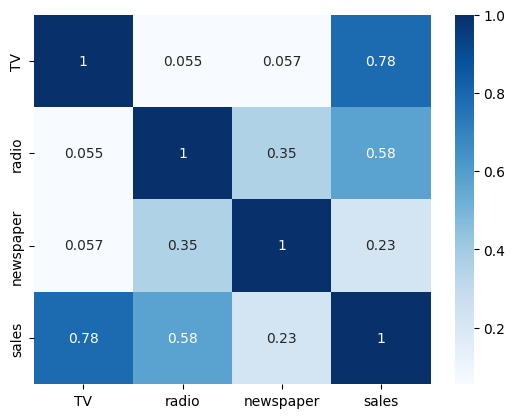

In [7]:
sns.heatmap(df.corr(), cmap="Blues", annot=True)
plt.show()

## Outlier Analysis

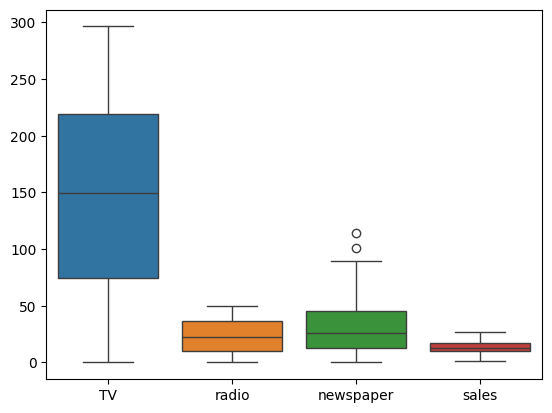

In [8]:
sns.boxplot(df)
plt.show()

In [9]:
for i in df:
    Q1=df[i].quantile(0.25)
    Q3=df[i].quantile(0.75)
    IQR=Q3-Q1
    df=df[(df[i]>Q1-1.5*IQR) & (df[i]< Q3+1.5*IQR)]

### Feature Selection

In [10]:
x=df.drop("sales",axis=1)
y=df["sales"]

### Train Test Split And Model Selection

In [11]:
x_train ,x_test ,y_train ,y_test = train_test_split(x, y, test_size=0.2, random_state= 42)

In [12]:
model= LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

### Predictions

In [13]:
y_pred=model.predict(x_test)

In [14]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Model Evaluation:")
print("RMSE:", round(rmse, 2))
print("R² Score:", round(r2, 4))

Model Evaluation:
RMSE: 1.66
R² Score: 0.8989


In [15]:
model.predict([[44, 54, 73]])

array([15.18730812])